#📌 Extracão

In [46]:
import requests
import pandas as pd
import numpy as np

In [47]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data_json = response.json()

# Transformando em DataFrame para visualizar sua estrutura
df = pd.DataFrame(data_json)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [48]:
# Normalizando os dados do arquivo .json
df_normalizado = pd.json_normalize(df.to_dict(orient='records'), sep='_')
df_normalizado.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Informação dos dados

In [49]:
def remove_prefix_string(text):
  """
  Remove o prefixo antes do primeiro '_' em uma string usando manipulacao de string.

  Args:
    text: A string de entrada.

  Returns:
    A string sem o prefixo e o '_', ou a string original se não houver '_'.
  """
  # Verifica se a entrada é uma string antes de aplicar a logica
  if isinstance(text, str):
    if '_' in text:
      return text.split('_', 1)[1]
  # Retorna a entrada original se não for uma string ou nao contiver '_'
  return text

# Renomear as colunas do DataFrame df_normalizado
df_normalizado = df_normalizado.rename(columns=lambda x: remove_prefix_string(x))

# Para visualizar as colunas renomeadas
print("Colunas do DataFrame após renomear:")
print("-" * 30)
for i, col in enumerate(df_normalizado.columns):
  print(f"{i}. {col}")
print("-" * 30)

# Para visualizar as primeiras linhas do DataFrame atualizado
df_normalizado.head()

Colunas do DataFrame após renomear:
------------------------------
0. customerID
1. Churn
2. gender
3. SeniorCitizen
4. Partner
5. Dependents
6. tenure
7. PhoneService
8. MultipleLines
9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. Charges_Monthly
20. Charges_Total
------------------------------


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [50]:
print(f'Linhas: {df_normalizado.shape[0]}\nColunas: {df_normalizado.shape[1]}')

Linhas: 7267
Colunas: 21


In [51]:
# Verificando o tipo das colunas e se há dados nulos
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [52]:
for col in df_normalizado.columns:
  print('-'*75)
  unique_values = df_normalizado[col].unique()
  if len(unique_values) > 10:  # Adjust this number to control how many unique values are displayed
    print(f'Coluna - {col}\nValores únicos - {unique_values[:10]}...')
  else:
    print(f'Coluna - {col}\nValores únicos - {unique_values}')

---------------------------------------------------------------------------
Coluna - customerID
Valores únicos - ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']...
---------------------------------------------------------------------------
Coluna - Churn
Valores únicos - ['No' 'Yes' '']
---------------------------------------------------------------------------
Coluna - gender
Valores únicos - ['Female' 'Male']
---------------------------------------------------------------------------
Coluna - SeniorCitizen
Valores únicos - [0 1]
---------------------------------------------------------------------------
Coluna - Partner
Valores únicos - ['Yes' 'No']
---------------------------------------------------------------------------
Coluna - Dependents
Valores únicos - ['Yes' 'No']
---------------------------------------------------------------------------
Coluna - tenure
Valores únicos - [ 9  4 13  3 71 63  

In [53]:
# Verificando se há dados duplicados
print(f'Há {df_normalizado.duplicated().sum()} dados duplicados')

Há 0 dados duplicados


In [54]:
# Verificando quantas linhas vazias há na coluna Churn
df_normalizado.query('Churn == ""').shape

(224, 21)

## Conclusões Iniciais
####**Inconsistências:**
- A coluna `account.Charges.Total` possui tipo de dado **`object`**
- A coluna `Churn` possui **224** valores vazios ('')
####**Tarefas:**
- Mudar o tipo de dado da coluna `account_Charges_Total` para float64
- Como o foco é explorar os churns, é preciso retirar as inconsistências `""` (Valores vazios)
- Criar a coluna `Daily_Charges` (Contas_Diarias)
- Padronizar valores textuais como `"Sim"` e `"Não"` em valores binários `(1 e 0)`, para facilitar o processamento matemático e a aplicação de modelos analíticos.

#🔧 Transformação

In [55]:
# Criando uma cópia do Df para realizar as transformações sem alterar o original
df_transformado = df_normalizado.copy()

### Retirando os valores vazios da coluna Churn

In [56]:
# Substituíndo '' por 'Unknown'
df_transformado = df_transformado[df_transformado['Churn'] != '']

In [57]:
# Verificando os valores únicos da coluna Churn novamente
df_transformado['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [58]:
df_transformado['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


### Convertendo o tipo da coluna account_Charges_Total

In [59]:
# pd.to_numeric? -> Realizando este código é possível ver como funciona o pd.to_numeric
# If 'coerce', then invalid parsing will be set as NaN. - Se for 'coerce', a análise inválida será definida como NaN
# ou seja, substituira os erros por NaN

In [60]:
df_transformado['Charges_Total'] = pd.to_numeric(df_transformado['Charges_Total'], errors='coerce')
df_transformado.info() # agora é float64

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

### Substituíndo os NaN da coluna account_Charges_Total

In [61]:
# Verificando a existência dos erros que foram transformados em NaNs, através do errors='coerce'
df_transformado['Charges_Total'].isna().sum()

np.int64(11)

### Análise de NaNs em account_Charges_Total

**Por que a coluna `account_Charges_Total` possui NaNs?**
- Ao investigar a presença de NaNs na coluna `account_Charges_Total`, que representa o total cobrado das contas pagas no ano, surgiu a questão do porquê algumas contas não foram pagas.

**Por que algumas contas não foram pagas?**
- Ao analisar os dados, foi observado um padrão nas colunas `customer_Dependents` e `customer_tenure`, onde todos os valores eram "Yes" e "0 meses", respectivamente.

**Qual coluna tem uma relação maior com a ausência de cobrança e por quê?**
- A coluna `customer_tenure`, que indica os meses de contrato do cliente, apresenta uma relação mais direta com a ausência de cobrança.

**Qual a interpretação possível para a ausência de cobrança baseada em `customer_tenure`?**
- A interpretação possível é que, como o cliente possui 0 meses de contrato, ele assinou recentemente e, portanto, a cobrança ainda não foi efetuada.

In [62]:
df_transformado[df_transformado['Charges_Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Dessa forma, há possibilidade de igualar a zero já que nenhuma cobrança foi feita ainda, assim preênchendo os valores NaN

In [63]:
df_transformado['Charges_Total'] = df_transformado['Charges_Total'].fillna(0.0) # já que é float64, será colocado o 0 em formato de float também (0.0)
df_transformado['Charges_Total'].isna().sum()

np.int64(0)

In [64]:
df_transformado.query('Charges_Total == 0')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


## Criando a coluna Daily_Charge

In [65]:
# 365 dias / 12 meses => media de dias por mês
df_transformado['Daily_Charge'] = round(df_transformado['Charges_Monthly'] / (round((365/12), 2)), 2)
df_transformado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Daily_Charge
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.76


## Padronizando valores textuais
- como "Sim" e "Não" em valores binários (1 e 0), para facilitar o processamento matemático e a aplicação de modelos analíticos.

In [66]:
df_padronizado = df_transformado.copy()

In [67]:
df_padronizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Daily_Charge'],
      dtype='object')

In [68]:
columns = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in columns:
  df_padronizado[col] = df_padronizado[col].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)



In [69]:
for col in df_padronizado.columns:
  print('-'*75)
  unique_values = df_padronizado[col].unique()
  if len(unique_values) > 10:  # Adjust this number to control how many unique values are displayed
    print(f'Coluna - {col}\nValores únicos - {unique_values[:10]}...')
  else:
    print(f'Coluna - {col}\nValores únicos - {unique_values}')

---------------------------------------------------------------------------
Coluna - customerID
Valores únicos - ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']...
---------------------------------------------------------------------------
Coluna - Churn
Valores únicos - [0 1]
---------------------------------------------------------------------------
Coluna - gender
Valores únicos - ['Female' 'Male']
---------------------------------------------------------------------------
Coluna - SeniorCitizen
Valores únicos - [0 1]
---------------------------------------------------------------------------
Coluna - Partner
Valores únicos - [1 0]
---------------------------------------------------------------------------
Coluna - Dependents
Valores únicos - [1 0]
---------------------------------------------------------------------------
Coluna - tenure
Valores únicos - [ 9  4 13  3 71 63  7 65 54 72]...
---------

#📊 Carga e análise

## Descrição dos dados

In [70]:
print(df_padronizado.describe())

             Churn  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.265370       0.162147     0.483033     0.299588    32.371149   
std       0.441561       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  Charges_Monthly  Charges_Total  \
count   7043.000000       7043.000000      7043.000000    7043.000000   
mean       0.903166          0.592219        64.761692    2279.734304   
std        0.295752          0.491457        30.090047    2266.794470   
min        0.000000    

In [71]:
for col in df_padronizado.select_dtypes(include='object').columns[1:]:
  print(df_padronizado[col].value_counts())
  print('-'*45)

gender
Male      3555
Female    3488
Name: count, dtype: int64
---------------------------------------------
MultipleLines
0                   3390
1                   2971
No phone service     682
Name: count, dtype: int64
---------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
---------------------------------------------
OnlineSecurity
0                      3498
1                      2019
No internet service    1526
Name: count, dtype: int64
---------------------------------------------
OnlineBackup
0                      3088
1                      2429
No internet service    1526
Name: count, dtype: int64
---------------------------------------------
DeviceProtection
0                      3095
1                      2422
No internet service    1526
Name: count, dtype: int64
---------------------------------------------
TechSupport
0                      3473
1                      2044
N

In [72]:
df_padronizado.to_csv('telecom_tratado.csv', index=False)

## Análise de Churns

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
sns.set_style('darkgrid')

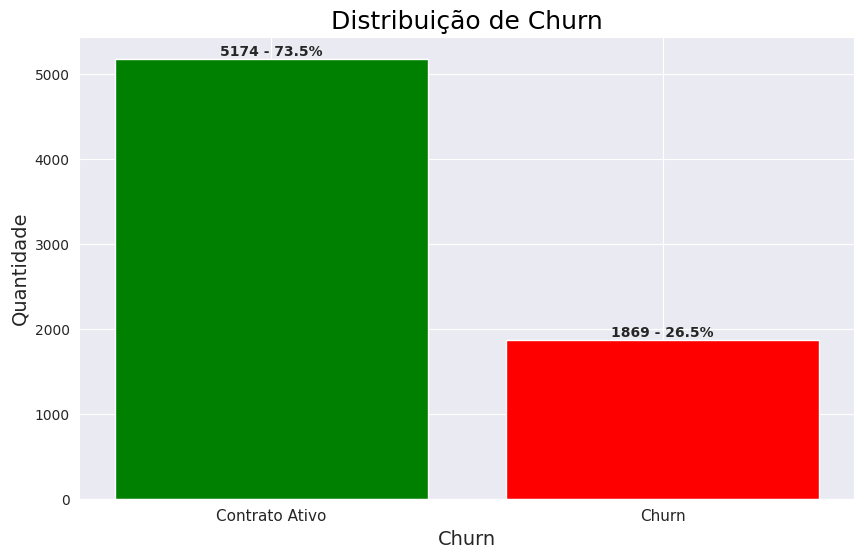

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
cor = ['#008000', '#FF0000']

ax.bar(df_padronizado['Churn'].value_counts().index, df_padronizado['Churn'].value_counts().values, color=cor)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Contrato Ativo', 'Churn'], fontsize=11)
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_title('Distribuição de Churn', fontsize=18, color='black')


for i, v in enumerate(df_padronizado['Churn'].value_counts().values):
      ax.text(i, v, str(v) + f' - {100*v/len(df_padronizado):.1f}%', ha='center', va='bottom', fontweight='bold')
plt.show()

## Extraíndo os Churns

In [76]:
palette = 'YlOrBr_r'
palette = 'mako'

Comparando com outros campos

## Clientes

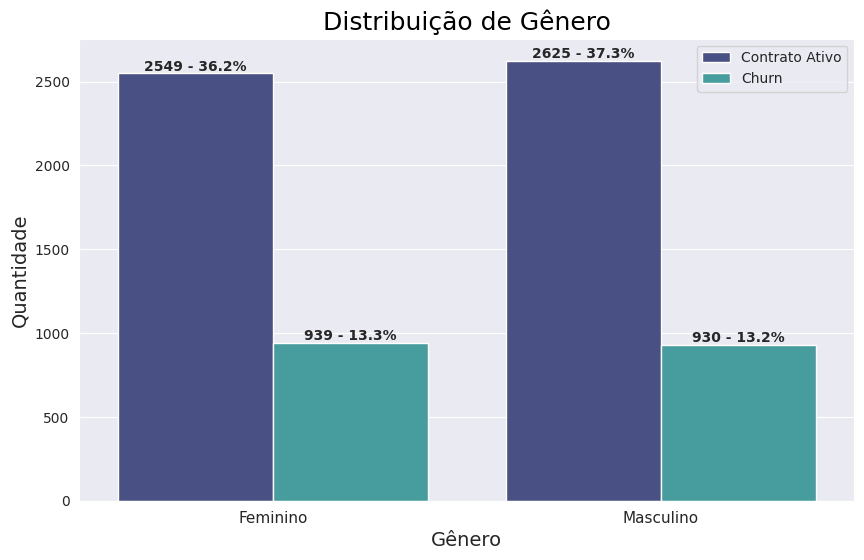

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=df_padronizado, x='gender', hue='Churn', palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'], fontsize=11)
ax.set_xlabel('Gênero', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_title('Distribuição de Gênero', fontsize=18, color='black')
ax.legend(labels=['Contrato Ativo', 'Churn'])

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
        ax.text(x, y, f'{y:.0f} - {100*y/len(df_padronizado):.1f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

## Clientes com ou sem Parceiros

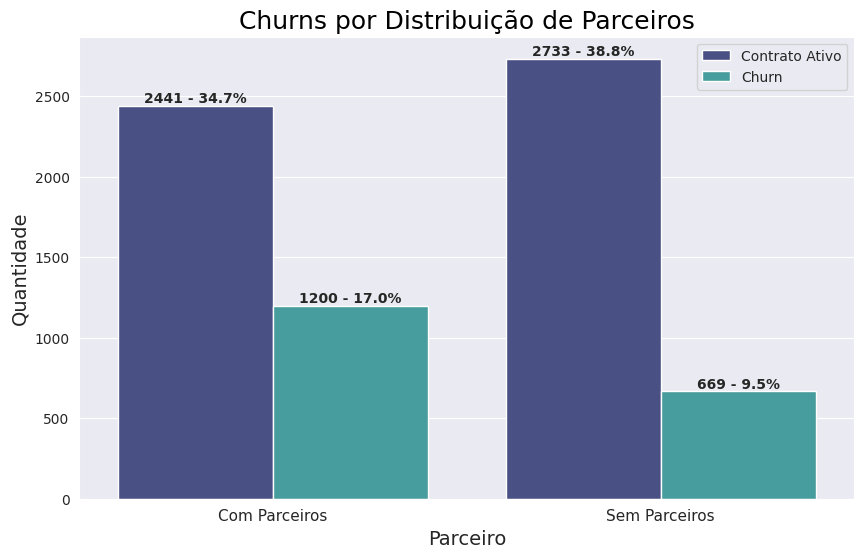

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=df_padronizado, x='Partner', hue='Churn', palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Com Parceiros', 'Sem Parceiros'], fontsize=11)
ax.set_xlabel('Parceiro', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_title('Churns por Distribuição de Parceiros', fontsize=18, color='black')
ax.legend(labels=['Contrato Ativo', 'Churn'])


for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
        ax.text(x, y, f'{y:.0f} - {100*y/len(df_padronizado):.1f}%', ha='center', va='bottom', fontweight='bold')

In [79]:
df_padronizado['SeniorCitizen'].unique()

array([0, 1])

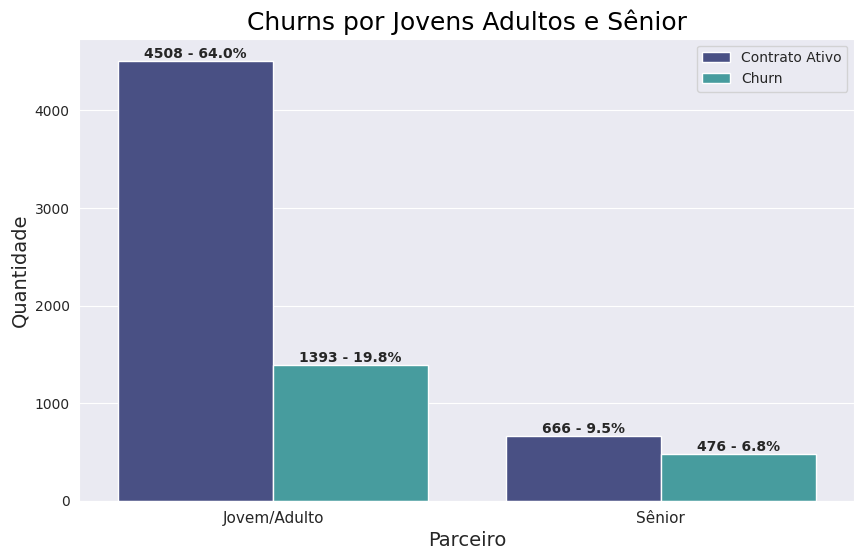

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=df_padronizado, x='SeniorCitizen', hue='Churn', palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Jovem/Adulto', 'Sênior'], fontsize=11)
ax.set_xlabel('Parceiro', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_title('Churns por Jovens Adultos e Sênior', fontsize=18, color='black')
ax.legend(labels=['Contrato Ativo', 'Churn'])


for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
        ax.text(x, y, f'{y:.0f} - {100*y/len(df_padronizado):.1f}%', ha='center', va='bottom', fontweight='bold')

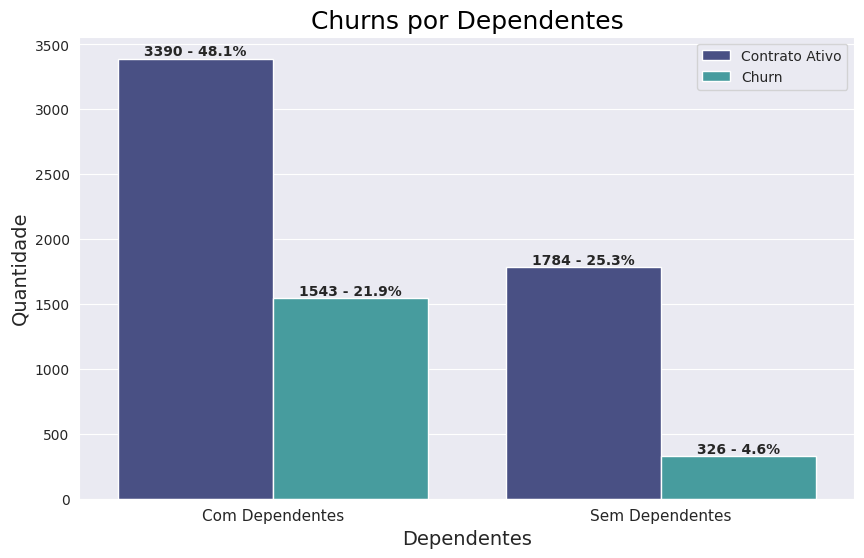

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=df_padronizado, x='Dependents', hue='Churn', palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Com Dependentes', 'Sem Dependentes'], fontsize=11)
ax.set_xlabel('Dependentes', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_title('Churns por Dependentes', fontsize=18, color='black')
ax.legend(labels=['Contrato Ativo', 'Churn'])


for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
        ax.text(x, y, f'{y:.0f} - {100*y/len(df_padronizado):.1f}%', ha='center', va='bottom', fontweight='bold')

Conclusões

Homens e Mulheres possuem taxa de Churn semelhantes, estas pessoas na faixa de Jovem/Adulto e que possam ter Dependentes (filho, esposa, marido) tem chances elevadas de Churn

## Correlação de Características dos clientes

Entre genero, faixa de idade e se possuem Dependentes

In [82]:

for col in df_padronizado.columns:
  print('-'*75)
  unique_values = df_padronizado[col].unique()
  print(f'Coluna - {col}\nValores únicos - {unique_values}')
  if len(unique_values) > 10:  # Adjust this number to control how many unique values are displayed
    print(f'Coluna - {col}\nValores únicos - {unique_values[:10]}...')

---------------------------------------------------------------------------
Coluna - customerID
Valores únicos - ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna - customerID
Valores únicos - ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']...
---------------------------------------------------------------------------
Coluna - Churn
Valores únicos - [0 1]
---------------------------------------------------------------------------
Coluna - gender
Valores únicos - ['Female' 'Male']
---------------------------------------------------------------------------
Coluna - SeniorCitizen
Valores únicos - [0 1]
---------------------------------------------------------------------------
Coluna - Partner
Valores únicos - [1 0]
---------------------------------------------------------------------------
Coluna - Dependents
Valores únicos - [1 0]
-------------------------------

## Resumindo as Relações de Churn por serviços

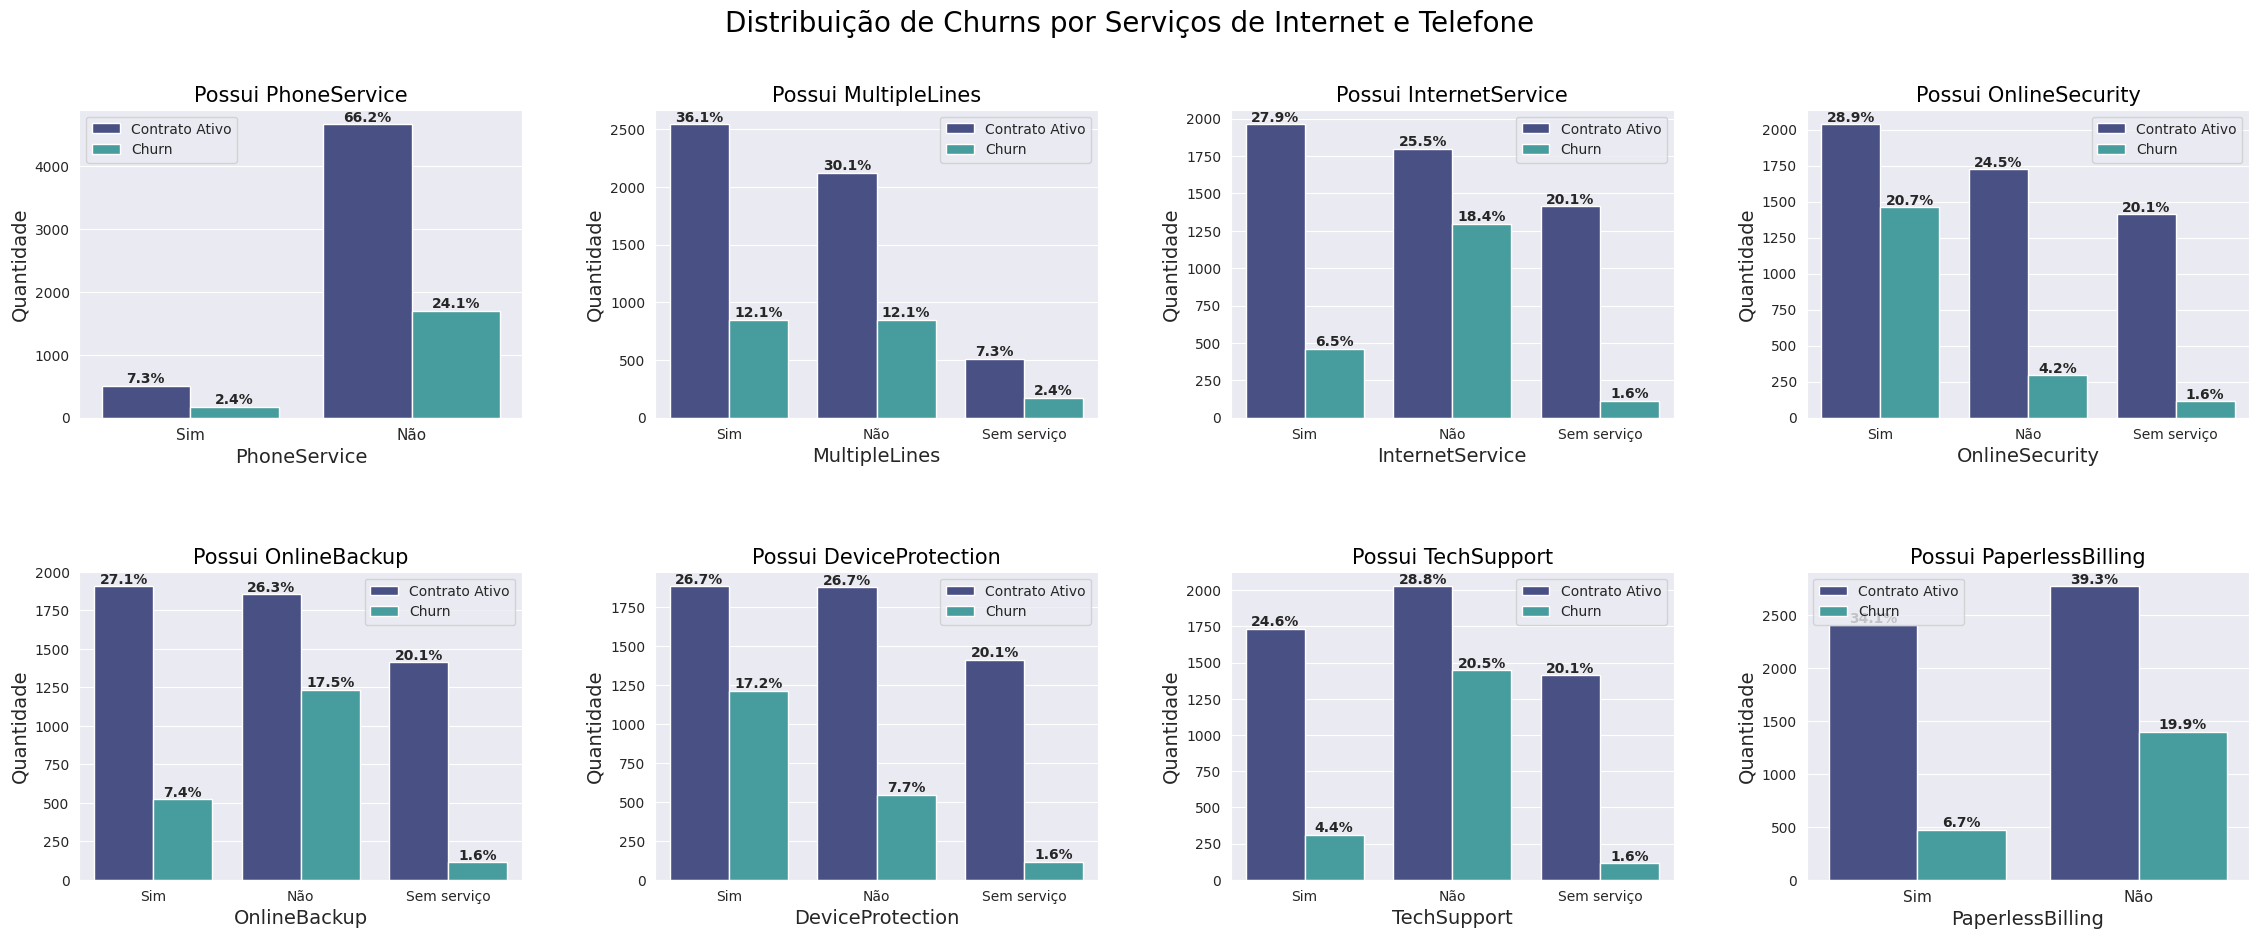

In [83]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'PaperlessBilling']

fig, axs = plt.subplots(2, 4, figsize=(28,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.suptitle('Distribuição de Churns por Serviços de Internet e Telefone', fontsize=20, color='black')

for i, ax in enumerate(axs.flatten()):
  sns.countplot(data=df_padronizado, x=columns[i], hue='Churn', palette=palette, ax=ax)
  if (i == 0) or (i == 7):
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Sim', 'Não'], fontsize=11)
  else:
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Sim', 'Não', 'Sem serviço'])

  ax.set_xlabel(columns[i], fontsize=14)
  ax.set_ylabel('Quantidade', fontsize=14)
  ax.set_title(f'Possui {columns[i]}', fontsize=15, color='black')
  ax.legend(labels=['Contrato Ativo', 'Churn'])

  for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
      ax.text(x, y, f'{100*y/len(df_padronizado):.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

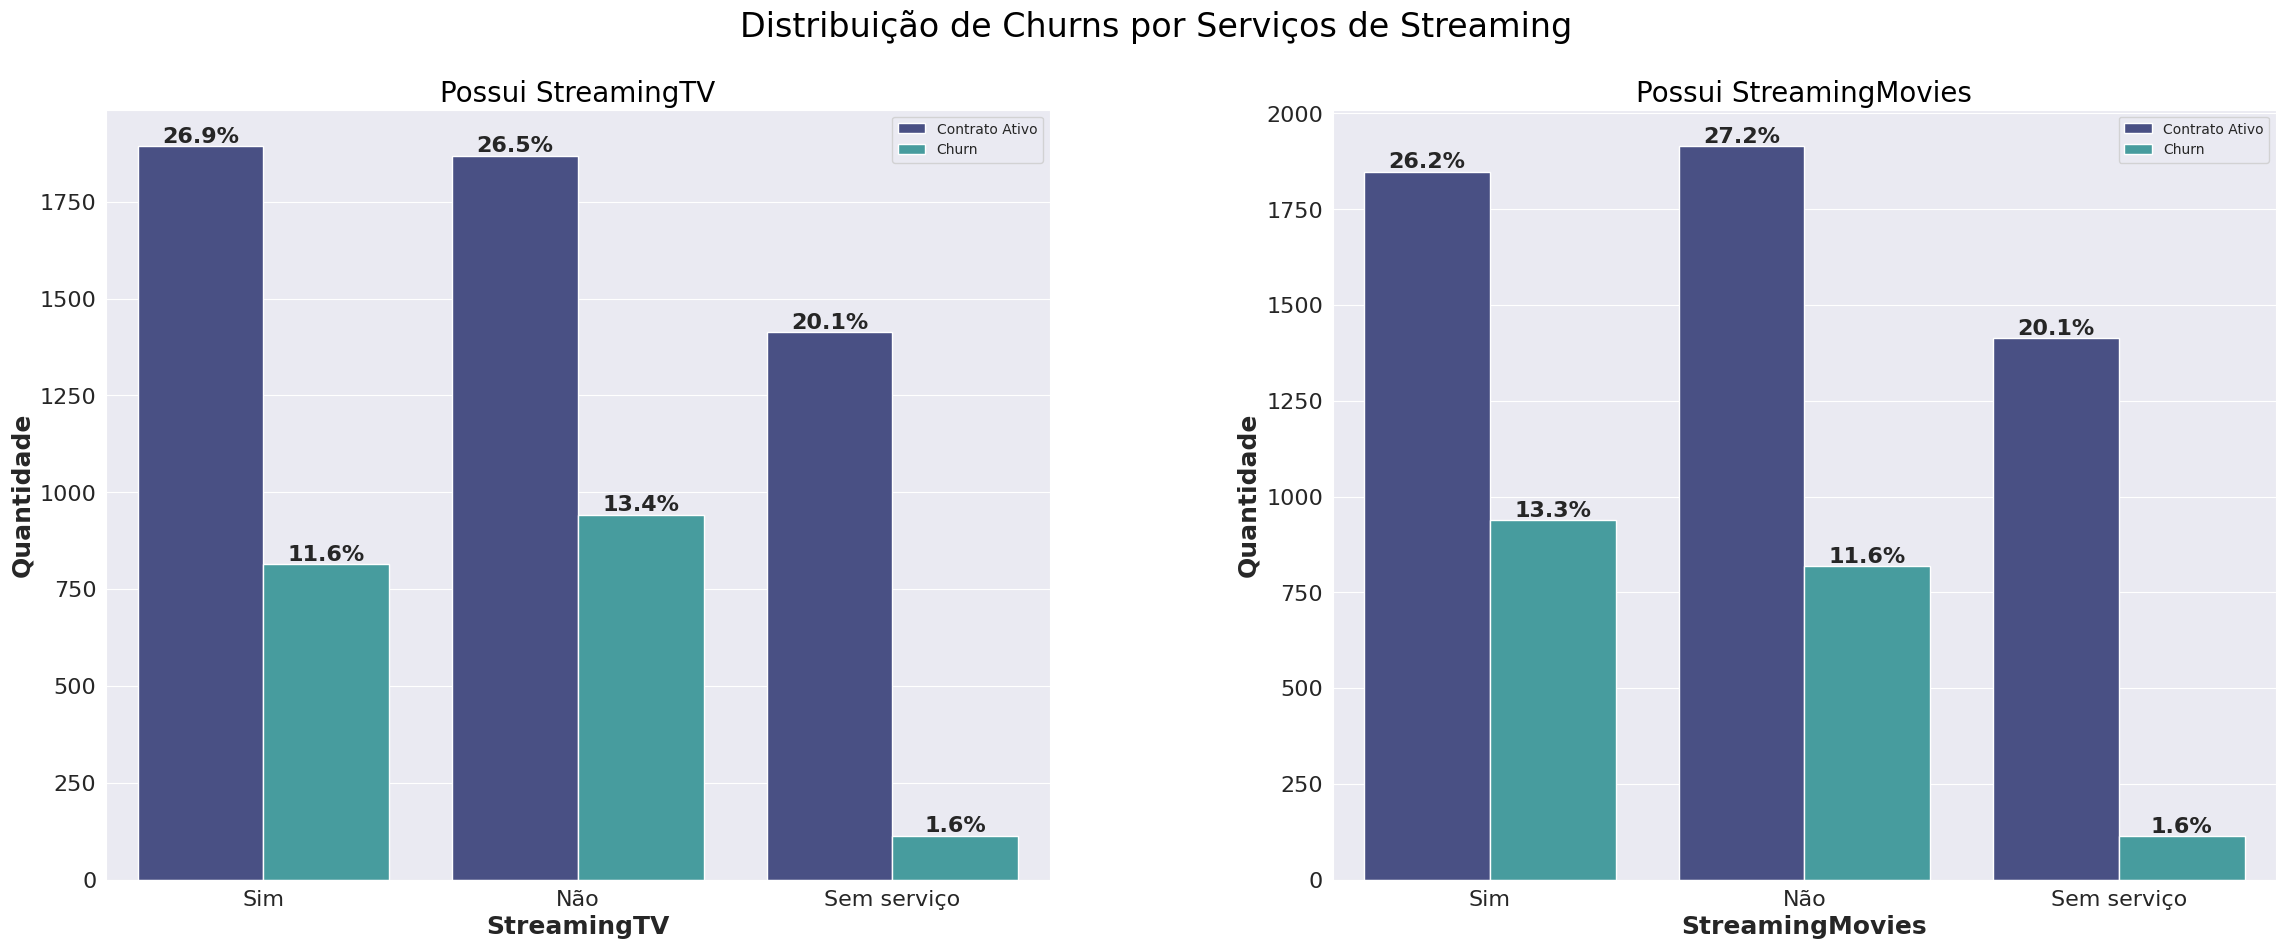

In [84]:
columns = ['StreamingTV', 'StreamingMovies']

fig, axs = plt.subplots(1, 2, figsize=(28,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.suptitle('Distribuição de Churns por Serviços de Streaming', fontsize=24, color='black')

for i, ax in enumerate(axs.flatten()):
  sns.countplot(data=df_padronizado, x=columns[i], hue='Churn', palette=palette, ax=ax)
  ax.set_xticks([0, 1, 2])
  ax.set_xticklabels(['Sim', 'Não', 'Sem serviço'])

  ax.set_xlabel(columns[i], fontsize=18, fontweight='bold')
  ax.set_ylabel('Quantidade', fontsize=18, fontweight='bold')
  ax.set_title(f'Possui {columns[i]}', fontsize=20, color='black')
  ax.tick_params(axis='both', labelsize=16)
  ax.legend(labels=['Contrato Ativo', 'Churn'])

  for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
      ax.text(x, y, f'{100*y/len(df_padronizado):.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=16)

## **Anotações**
**PhoneService** - é preciso de mais ofertas interessantes para atrair o cliente

**MultipleLines** - Revisar a possibilidade de melhora de serviço para múltiplas linhas, podendo aumentar a taxa de contrato ativo, como diz na figura.

**InternetService** - Revisar o que pode ofertar de benefícios a mais para gerar mais atração e confiabilidade no cliente, pois grande parte que não possui serviço de internet tende a cancelar o contrato.

**OnlineSecurity** - É preciso urgentemente melhorar este serviço, verificando as avaliações das pessoas sobre, e descobrir o que é preciso melhorar, pois grande parte que aderiu a este mesmo, tende a cancelar o contrato.

**OnlineBackup** -  Revisar o que pode melhorar a mais para gerar mais atração e confiabilidade no cliente, através das próprias avaliações descobrindo o que pode adicionar, arrumar ou excluir (se necessário), pois grande parte que não possui serviço de internet tende a cancelar o contrato

**DeviceProtection** - Um alerta que grande maioria das pessoas tendem a cancelar, que mesmo possuíndo o serviço de proteção, provavelmente por não ser confiável, devido a certos problemas que este serviço possuí que não agradam ao cliente. Verificar o que pode ser feito para melhorar a qualidade do serviço

**TechSupport** - Muitos não aderiram ao serviço e tendem a cancelar, os clientes precisam conhecer mais sobre para conseguir extrair todas as suas qualidades, além de melhorar a divulgação deste serviço.

**PaperlessBilling** - Metade dos clientes que não recebem as faturas via internet, tendem a cancelar. Precisa-se divulgar mais as formas de como realizar este processo, muitos clientes podem não saber como
fazer isto, isso dificulta sua experiência.

**StreamingTV** - é preciso melhorar tanto o serviço, como sua divulgação, pois ambos possuem churn semelhantes, sendo aqueles que não possuem este serviço ligeiramente maior dos que possuem.

**StreamingMovies** - é preciso melhorar tanto o serviço, como sua divulgação, pois ambos possuem churn semelhantes, sendo aqueles que não possuem este serviço ligeiramente menor dos que possuem.

## Churn por Método de Pagamento

In [85]:
palette='mako'

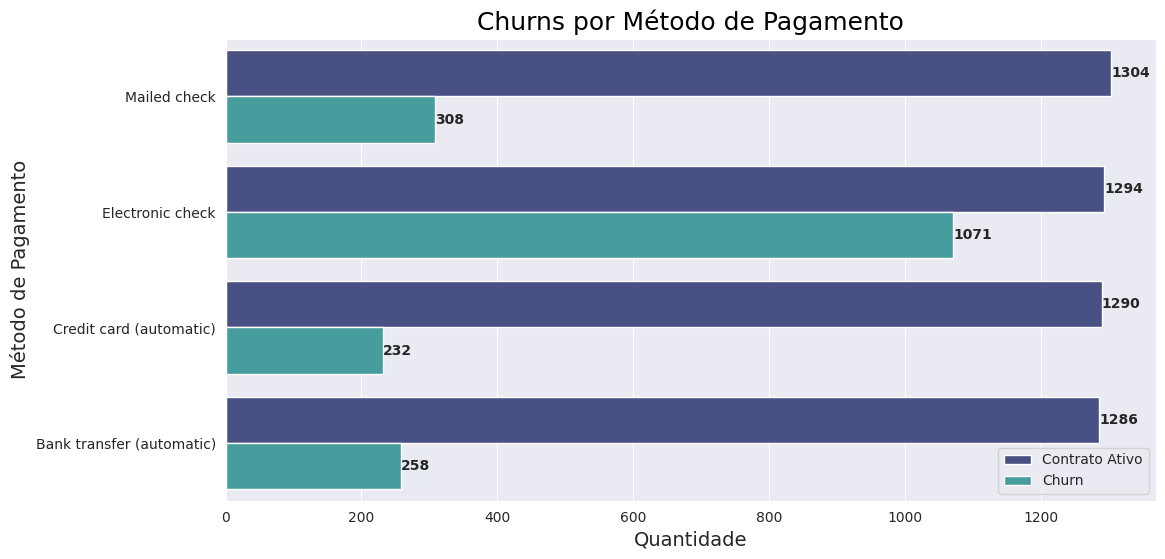

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(data=df_padronizado, y='PaymentMethod', hue='Churn', palette=palette)
ax.set_xlabel('Quantidade', fontsize=14)
ax.set_ylabel('Método de Pagamento', fontsize=14)
ax.set_title('Churns por Método de Pagamento', fontsize=18, color='black')
ax.legend(labels=['Contrato Ativo', 'Churn'])

for patch in ax.patches:
    x = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    if x != 0:
        ax.text(x, y, f'{x:.0f}', ha='left', va='center', fontweight='bold')

plt.show()

Eletronic check - Onde ocorre mais cancelamentos de contratos

-- Verificar a correlação com os serviços e tipos de clientes

## Analise de Churn ao longo dos meses de Tenure

Os gráficos mostram que durante os tenures de meses iniciais e contratos mensais, os churns tendem a ser mais altos do que comparados com contratos de longo prazo.



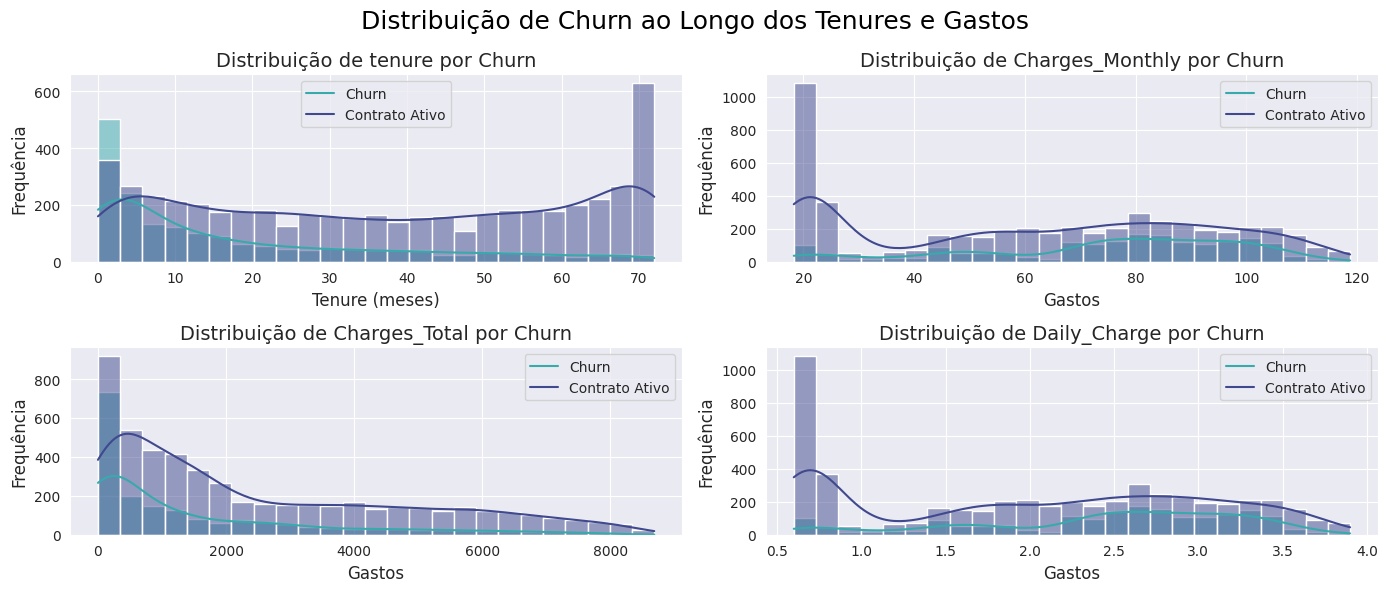

In [87]:
numeric_cols = ['tenure', 'Charges_Monthly', 'Charges_Total', 'Daily_Charge']

fig, axes = plt.subplots(2, 2, figsize=(14, 6)) # Ajusta o tamanho da figura
fig.suptitle('Distribuição de Churn ao Longo dos Tenures e Gastos', fontsize=18,color='black')

axes = axes.flatten()

# Iterando sobre as colunas numéricas e criando um histplot para cada uma
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_padronizado, x=col, hue='Churn', kde=True, ax=axes[i], bins=25, palette=palette)
    axes[i].set_title(f'Distribuição de {col} por Churn', fontsize=14)
    if col == 'tenure':
        axes[i].set_xlabel('Tenure (meses)', fontsize=12)
    else:
      axes[i].set_xlabel('Gastos', fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)
    axes[i].legend(labels=['Churn', 'Contrato Ativo'])

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

Análise da Distribuição de Variáveis Numéricas por Churn:

Os histogramas acima ilustram a distribuição de variáveis numéricas chave ('tenure', 'Charges_Monthly',
'Charges_Total' e 'Daily_Charge') para clientes que cancelaram (Churn) e aqueles que mantiveram seus
contratos (Contrato Ativo).

Observações Principais:

- **Tenure (Tempo de Contrato)**: Clientes que cancelaram tendem a ter um 'tenure' menor, concentrando-se nos
  primeiros meses de serviço. Isso sugere que os primeiros meses são críticos para a retenção de clientes.
  Clientes com 'tenure' mais longo demonstram maior lealdade e menor probabilidade de Churn.

- **Charges_Monthly (Cobrança Mensal)**: A distribuição das cobranças mensais para clientes com Churn parece ser
  um pouco mais dispersa e com pico em valores menores comparado aos clientes ativos, que mostram uma
  distribuição mais uniforme ou com pico em valores maiores. Isso pode indicar que clientes com gastos
  mensais mais baixos ou que não veem valor suficiente no serviço (refletido no gasto) são mais propensos
  a cancelar.

- **Charges_Total (Cobrança Total)**: Refletindo o 'tenure', a distribuição de 'Charges_Total' para clientes
  que cancelaram é significativamente concentrada em valores mais baixos, como esperado, pois o total
  cobrado acumula ao longo do tempo. Clientes ativos, especialmente aqueles com longo 'tenure', apresentam
  valores de 'Charges_Total' muito mais altos.

- **Daily_Charge (Cobrança Diária)**: A distribuição da cobrança diária, calculada a partir da cobrança mensal,
  apresenta um padrão similar à 'Charges_Monthly'. Clientes com Churn podem mostrar uma tendência para
  valores de 'Daily_Charge' ligeiramente menores ou uma distribuição diferente em comparação com clientes ativos.

Em resumo, a análise das variáveis numéricas reforça que o tempo de contrato é um fator crucial na evasão,
com maior risco nos períodos iniciais. As variáveis de cobrança ('Charges_Monthly', 'Charges_Total',
'Daily_Charge') também se correlacionam com o Churn, refletindo tanto o tempo de contrato quanto
possivelmente a percepção de valor do cliente em relação ao custo do serviço.

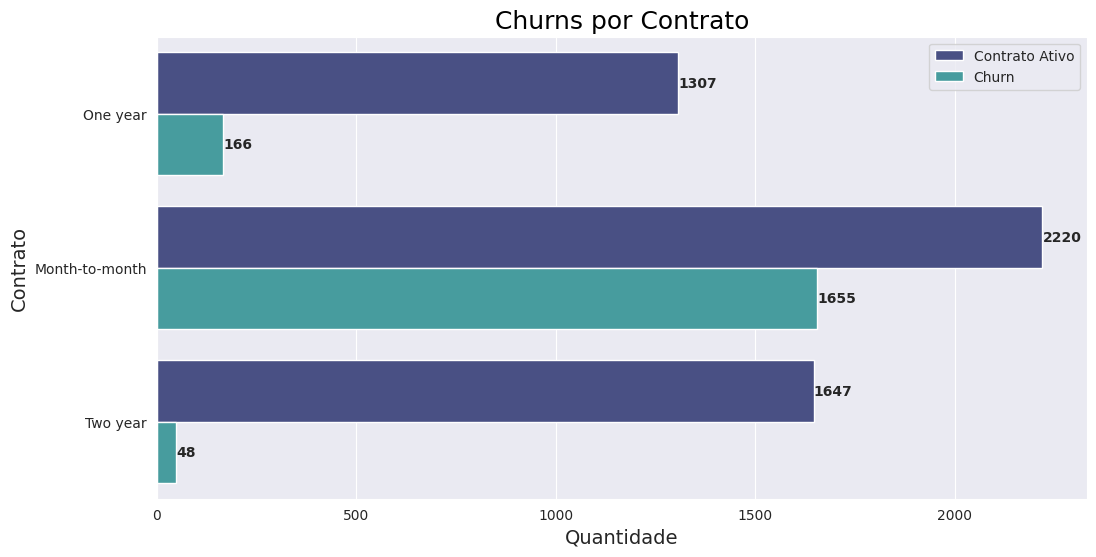

In [88]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(data=df_padronizado, y='Contract', hue='Churn', palette=palette)
ax.set_xlabel('Quantidade', fontsize=14)
ax.set_ylabel('Contrato', fontsize=14)
ax.set_title('Churns por Contrato', fontsize=18, color='black')
ax.legend(labels=['Contrato Ativo', 'Churn'])

for patch in ax.patches:
    x = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    if x != 0:
        ax.text(x, y, f'{x:.0f}', ha='left', va='center', fontweight='bold')

plt.show()

Clientes com contratos de curto prazo, como os mensais, apresentam uma taxa de cancelamento (Churn) significativamente maior do que aqueles com contratos mais longos. O gráfico demonstra claramente que os Churns são mais proeminentes para contratos mensais, indicando uma maior propensão desses clientes em deixar o serviço.


## Analisando Correlações

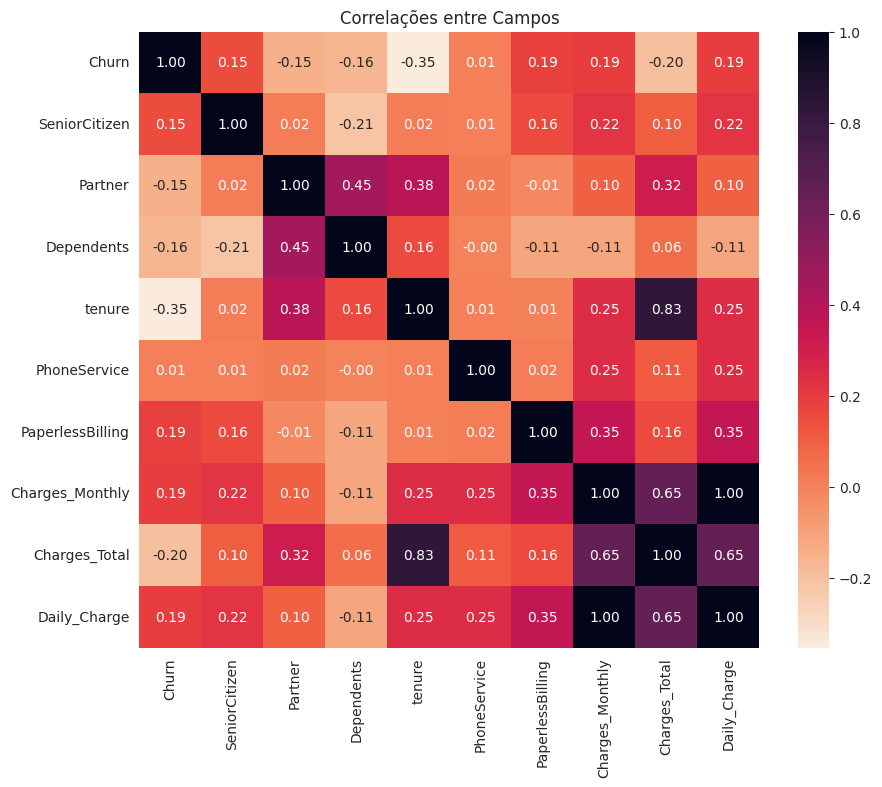

In [89]:
corr = df_padronizado.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, cmap='rocket_r', fmt=".2f")
plt.title('Correlações entre Campos')
plt.show()

**Interpretação das correlações mais fortes com Churn:**

As correlações mostram como uma característica está relacionada ao Churn. Um número positivo significa que quanto maior o valor dessa característica, maior a chance de Churn. Um número negativo significa que quanto maior o valor, menor a chance de Churn.

**Top 5 correlações mais fortes com Churn:**

*   **'tenure' (Tempo de Contrato): -0.35**
    *   Essa é a correlação mais forte e é **negativa**. Isso significa que **quanto maior o tempo que um cliente está conosco, menor a chance de ele cancelar (Churn)**. Clientes novos (com 'tenure' baixo, perto de 0) têm a maior probabilidade de sair.
*   **'Charges_Total' (Cobrança Total): -0.20**
    *   Assim como 'tenure', esta correlação é **negativa**. Clientes que acumularam um valor total maior ao longo do tempo tendem a **cancelar menos**. Isso faz sentido, pois 'Charges_Total' aumenta com o 'tenure'.
*   **'Daily_Charge' (Cobrança Diária): 0.19**
    *   Esta correlação é **positiva**. Clientes com uma **cobrança diária mais alta** têm uma chance um pouco **maior de cancelar**. Isso sugere que clientes que pagam mais por dia podem estar mais propensos a sentir que o custo não justifica o valor.
*   **'Charges_Monthly' (Cobrança Mensal): 0.19**
    *   Similar à cobrança diária, esta correlação é **positiva**. Clientes com **cobranças mensais mais altas** tendem a ter uma chance um pouco **maior de cancelar**. Isso reforça a ideia de que o custo percebido é um fator.
*   **'PaperlessBilling' (Fatura Online): 0.19**
    *   Esta correlação é **positiva**. Clientes que optam por receber **faturas online** têm uma chance um pouco **maior de cancelar**. Isso pode estar relacionado a serem clientes mais digitalizados e talvez mais propensos a comparar serviços online, ou talvez haja algum problema com o processo de fatura online que cause insatisfação.

**Outras relações notáveis com Churn:**

*   **Partner (Possui Parceiro) (-0.15) e Dependents (Possui Dependentes) (-0.16):**
    *   Ambas as correlações são **negativas**. Clientes que **têm parceiro ou dependentes** tendem a **cancelar menos**. Famílias ou casais parecem ser clientes mais estáveis e com menor probabilidade de sair.

**Em resumo:**

Os fatores mais importantes ligados ao Churn são:

1.  **Tempo de Contrato (tenure):** O fator mais crucial. Clientes nos **primeiros meses** têm a **maior probabilidade de cancelar**.
2.  **Custo:** Clientes com **cobranças mensais e diárias mais altas** têm uma chance um pouco maior de cancelar.
3.  **Família:** Clientes com **parceiro ou dependentes** são mais propensos a **permanecerem**.
4.  **Fatura Online:** Clientes que usam **fatura online** mostram uma leve tendência a **cancelar mais**.

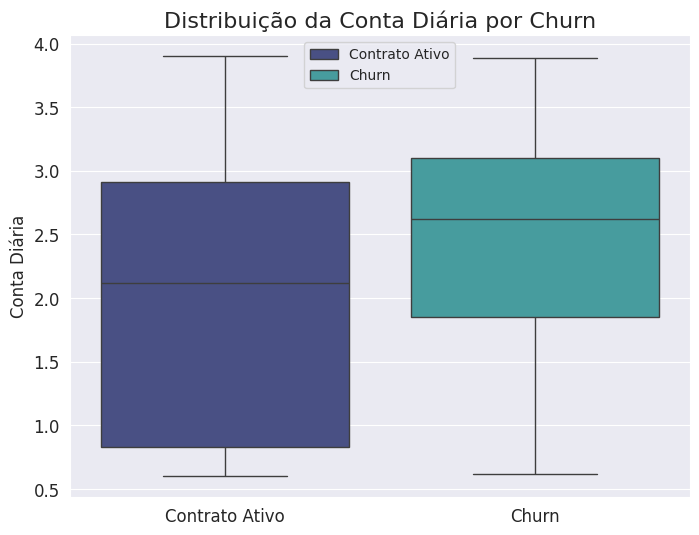

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_padronizado, x='Churn', y='Daily_Charge', hue='Churn', palette='mako')
plt.title('Distribuição da Conta Diária por Churn', fontsize=16)
plt.xlabel('')
plt.ylabel('Conta Diária', fontsize=12)
plt.xticks([0, 1], ['Contrato Ativo', 'Churn'])
plt.tick_params(axis='both', labelsize=12)
plt.legend(labels=['Contrato Ativo', 'Churn'])
plt.show()

Quanto mais altos os gastos diários forem maior probabilidade do contrato ser cancelado

#📄Relatorio Final
## 1. Introdução
Este documento apresenta os resultados da Análise Exploratória de Dados aplicada ao dataset de clientes da TelecomX, com foco em entender os principais fatores que levam ao cancelamento de serviço (Churn) e sugerir ações para reduzir essa taxa.

## 2. Metodologia
1. **Extração**: importação de dados a partir de arquivo JSON.
2. **Transformação**:
   - Normalização do JSON em DataFrame pandas.
   - Remoção de registros sem valor em Churn.
   - Conversão de TotalCharges para float; valores faltantes ajustados para 0.
   - Criação de Daily_Charge = MonthlyCharges / 30.
   - Mapeamento de Yes/No para 1/0 em colunas de serviços e faturamento digital.
3. **Análise**:
   - Estatísticas descritivas de variáveis numéricas e contagens de categorias.
   - Visualizações: histogramas, boxplots, gráficos de barras.
   - Cálculo de taxas de churn por segmento e correlações.

## 3. Fatores Contribuintes ao Churn

| Fator                   | Descrição                                                      |
|-------------------------|----------------------------------------------------------------|
| **Tenure < 6 meses**        | risco de churn muito alto                                      |
| **Contrato mensal **        | 42,7% de churn vs. 11,1% (1 ano) e 2,9% (2 anos)               |
| **Daily_Charge elevado**    | custos diários altos → maior evasão                            |
| **Electronic check**        | método de pagamento com maior churn                            |
| **Sem serviços adicionais** | Falta de uso dos serviços (OnlineSecurity, TechSupport e OnlineBackup) elevam os índices de Churns         |
| **PaperlessBilling = 1**    | churn levemente superior                                       |
| **SeniorCitizen = 0**      | jovens/adultos têm maior probabilidade de cancelar             |

## 4. Recomendações Práticas
1. **Onboarding Intensivo (0–6 meses)**
   - Suporte dedicado e check‑ins quinzenais.
   - Tutoriais rápidos e FAQ interativo.
2. **Incentivo a Contratos Longos**
   - Desconto de 15% para renovação anual.
   - Oferta de três meses grátis em contratos bienais.
3. **Bundles de Serviços**
   - Pacote “Segurança Total”: OnlineSecurity + TechSupport + Backup com 20% de desconto.
   - Comunicação clara do valor agregado.
4. **Otimização do Electronic check**
   - Auditar processo de cobrança e resolver falhas de usabilidade.
   - Incentivar migração a débito automático com desconto de 5%.
5. **Campanhas Segmentadas**
   - Focar em novos clientes, jovens/adultos e usuários de fatura digital.
   - Enviar ofertas personalizadas 30 dias antes do término do contrato.

## 5. Conclusão e Próximos Passos
- Implementar recomendações com cronograma e KPIs definidos.
- Desenvolver modelo preditivo de churn para identificar clientes em risco.
- Monitorar trimestralmente churn rate e ajustar estratégias conforme feedback.
